<img src="https://files.sunoresearch.com.br/p/uploads/2022/08/O-que-sao-os-codigos-das-acoes-b.png" style='width: 100%' alt="Descrição da imagem">

## **Series Temporais**

#### **O que é uma Série Temporal?**

Uma série temporal é um conjunto de dados observados ao longo do tempo, onde cada ponto de dados está associado a um momento específico. Esses dados são coletados sequencialmente, em intervalos regulares ou irregulares, formando uma coleção que permite estudar padrões e mudanças ao longo de períodos temporais definidos.

#### **Caracteristicas**

- **Tempo como eixo principal:** variável independente em uma série temporal é sempre o tempo.
- **Sequencialidade:**: Os dados sempre estão em ordem cronológica ou sequêncial e cada observação está relacionada ao tempo anterior e/ou posterior.
- **Intervalos de observação:** podem ter intervalos uniformes ou irregulares entre cada ponto de dados.

#### **Aplicações**

- **Previsão:** Prever valores futuros com base em padrões observados.
- **Análise de Tendência:** Identificar tendências de longo prazo nos dados.
- **Análise de Sazonalidade:**  Reconhecer padrões recorrentes que se repetem em intervalos fixos de tempo.
- **Modelagem Estatística:** Usar modelos estatísticos para entender e extrair insights dos dados.

#### **São Séries Temporais:**

- **Dados Climáticos:** Temperaturas registradas ao longo dos anos.
- **Dados Economicos:** Preços de ações ao longo do tempo.
- **Dados de Tráfego:** Fluxo de veículos em uma rodovia por hora.
- **Dados de Vendas:** Vendas diárias de um produto.

## **Entendimento dos Dados**

#### **Coleta dos Dados**

Os dados utilizados foram coletados através da API do Yahoo Finance e referem-se às ações da Nu Holdings Ltd (NU). Eles estão disponíveis para consulta através do link: https://finance.yahoo.com/quote/NU/ .

In [70]:
!pip install pmdarima


[notice] A new release of pip is available: 23.3.1 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [71]:
import numpy as np
import pandas as pd

from statsmodels.tsa.seasonal import seasonal_decompose

from pmdarima import auto_arima

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

import yfinance as yf

import warnings

pd.options.display.float_format = lambda x: f'{x:.2f}'
sns.set_style(style='dark')
warnings.filterwarnings(action='ignore')

In [72]:
ticket = 'NU'
start_date = '2023-07-01'
end_date = '2024-07-01'

nu_data = yf.download(
    tickers=ticket,
    start=start_date,
    end=end_date 
)

nu_data.to_csv('../data/raw/nu_stock_data.csv', index=False)

nu_data.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-07-03,7.93,8.01,7.82,7.96,7.96,11954200
2023-07-05,7.92,7.97,7.76,7.88,7.88,18233700
2023-07-06,7.79,7.86,7.61,7.67,7.67,18086200
2023-07-07,7.71,7.87,7.65,7.78,7.78,16975000
2023-07-10,7.75,7.87,7.71,7.82,7.82,8913500


#### **Descrição dos dados**

| **Variável** | **Descrição** | **Tipo** |
| -------- | ----------- | ----------- |
|Open|Preço de abertura da ação no início do período de negociação|Flutuante|
|Hight|Preço mais alto alcançado pela ação durante o período de negociação|Flutuante|
|Low|Preço mais baixo alcançado pela ação durante o período de negociação|Flutuante|
|Close|Preço de fechamento da ação no final do período de negociação|Flutuante|
|Adj Close|Preço de fechamento ajustado, considerando ajustes|Flutuante|
|Volume|Número de ações negociadas durante o período de negociação|Inteiro|
    

## **Métricas**

In [73]:
# periodo da análise

oldest_record = nu_data.index.min().strftime('%Y-%m-%d')
newest_record = nu_data.index.max().strftime('%Y-%m-%d')

print("Registro mais antigo:", oldest_record)
print("Registro mais novo:", newest_record)

Registro mais antigo: 2023-07-03
Registro mais novo: 2024-06-28


#### **Média Móvel**

Uma média móvel é um indicador estatístico que calcula o valor médio de um conjunto de dados ao longo de um período contínuo e deslizante. Em outras palavras, ela suaviza as flutuações de curto prazo dos dados, destacando tendências ou padrões de longo prazo.

Médias móveis podem ser do tipo:

- **Simples (SMA):** quando calculada como a média aritmética simples dos preços de fechamento de um ativo ao longo de um período específico.

- **Exponencial (EMA):** Acrescenta mais peso aos preços mais recentes, usando uma fórmula que atribui um multiplicador maior aos dados mais recentes e um multiplicador menor aos dados mais antigos.

In [74]:
palette = {
    'purple': '#9400d3',
    'blue': 'cornflowerblue',
    'red': 'firebrick',
    'green': 'green',
    'gray': '#404040',
    'light_gray': '#938ca1'
}

fontsize = {
    'header': 18,
    'footer': 12,
    'figure_title': 14,
    'figure_label': 12,
    'figure_ticks': 10
}

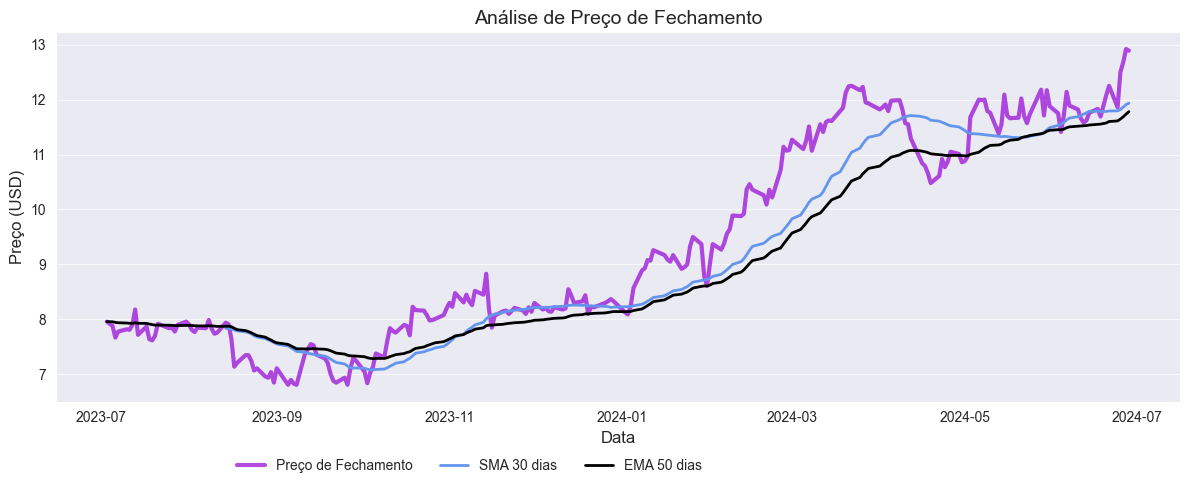

In [75]:
nu_data['SMA30'] = nu_data['Close'].rolling(window=30).mean()
nu_data['EMA50'] = nu_data['Close'].ewm(span=50, adjust=False).mean()

plt.figure(figsize=(12, 5))

plt.title('Análise de Preço de Fechamento', fontsize=fontsize['figure_title'])
plt.plot(nu_data['Close'], color=palette['purple'], label='Preço de Fechamento', linewidth=3, alpha=0.7)
plt.plot(nu_data['SMA30'], color=palette['blue'], label='SMA 30 dias', linewidth=2)
plt.plot(nu_data['EMA50'], color='black', label='EMA 50 dias', linewidth=2)
plt.legend(loc='upper left', bbox_to_anchor=(0.15, -0.12), ncol=3, facecolor='white', edgecolor='white')
plt.xlabel('Data', fontsize=fontsize['figure_label'])
plt.ylabel('Preço (USD)', fontsize=fontsize['figure_label'])
plt.grid(axis='y', alpha=0.7)

plt.tight_layout()

plt.show()

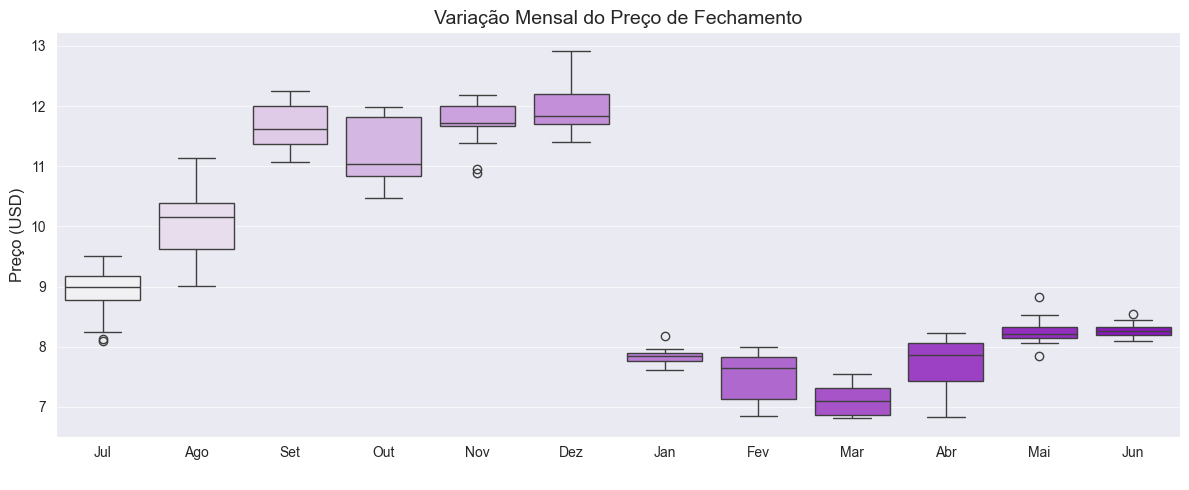

In [76]:
meses = [
    'Jul', 'Ago', 'Set', 'Out',
    'Nov', 'Dez', 'Jan', 'Fev',
    'Mar', 'Abr', 'Mai', 'Jun'
]

nu_data['Month'] = nu_data.index.month

plt.figure(figsize=(12, 5))

plt.title('Variação Mensal do Preço de Fechamento', fontsize=fontsize['figure_title'])

sns.boxplot(
    data=nu_data,
    x='Month',
    y='Close',
    palette=sns.light_palette(palette['purple'], n_colors=nu_data['Month'].nunique())
)

plt.xlabel(' ')
plt.ylabel('Preço (USD)', fontsize=fontsize['figure_label'])
plt.xticks(ticks=np.arange(len(meses)), labels=meses, ha='center', fontsize=fontsize['figure_ticks'])
plt.grid(axis='y', alpha=0.7)

plt.tight_layout()

plt.savefig('../reports/figures/close-price-month-distribution.png', bbox_inches='tight', dpi=300)

plt.show()

#### **Bandas de Bollinger**

As Bandas de Bollinger são indicadores técnicos usados na análise de mercados financeiros para medir a volatilidade de um ativo e identificar possíveis pontos de compra e venda.

**Interpretação**

- **Volatilidade:** As bandas se expandem quando a volatilidade aumenta e se contraem quando a volatilidade diminui.

- **Sobrecompra:** Quando os preços tocam a banda superior, o ativo pode estar sobrecomprado, indicando um preço inflacionado devido à pressão de compra excessiva. Isso sugere uma possível correção ou reversão para baixo, sendo uma oportunidade para os traders venderem ou saírem de posições compradas.

- **Sobrevenda:** Quando os preços tocam a banda inferior, o ativo pode estar sobrevendido, indicando um preço depreciado devido à pressão de venda excessiva. Isso sugere uma possível recuperação ou reversão para cima, sendo uma oportunidade para os traders comprarem ou entrarem em posições compradas.

**Reversões**

Reversões podem ocorrer quando:

- Os preços rompem a banda superior e depois voltam para dentro das bandas, sinalizando uma oportunidade de venda.

- Os preços rompem a banda inferior e depois voltam para dentro das bandas, sinalizando uma oportunidade de compra.

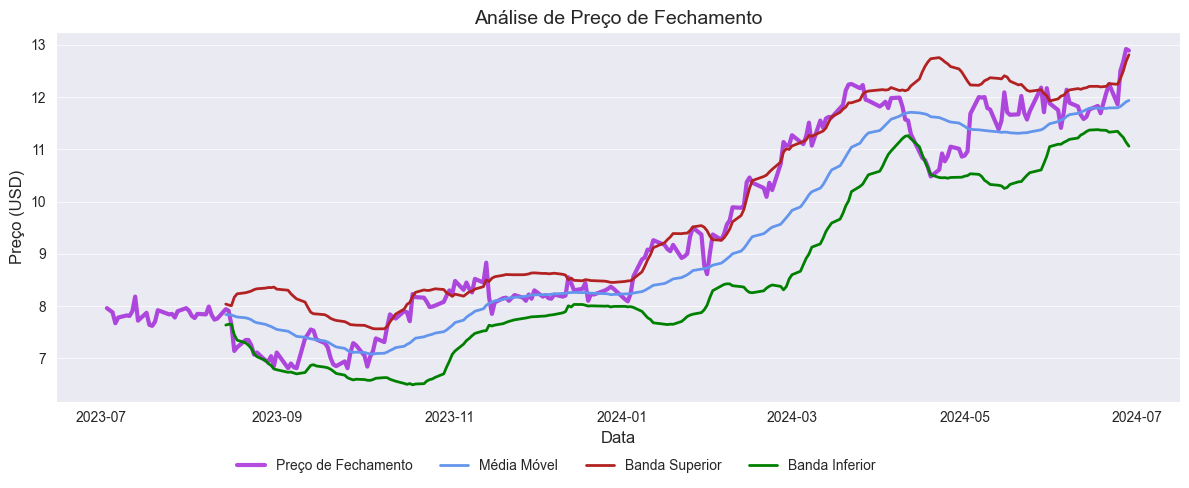

In [77]:
nu_data['Std'] = nu_data['Close'].rolling(window=20).std()
nu_data['Upper_Band'] = nu_data['SMA30'] + 2 * nu_data['Std']
nu_data['Lower_Band'] = nu_data['SMA30'] - 2 * nu_data['Std']

plt.figure(figsize=(12, 5))

plt.title('Análise de Preço de Fechamento', fontsize=fontsize['figure_title'])
plt.plot(nu_data['Close'], color=palette['purple'], label='Preço de Fechamento', linewidth=3, alpha=0.7)
plt.plot(nu_data['SMA30'], color=palette['blue'], label='Média Móvel', linewidth=2)
plt.plot(nu_data['Upper_Band'], color=palette['red'], label='Banda Superior', linewidth=2)
plt.plot(nu_data['Lower_Band'], color=palette['green'], label='Banda Inferior', linewidth=2)
plt.legend(loc='upper left', bbox_to_anchor=(0.15, -0.12), ncol=4, facecolor='white', edgecolor='white')
plt.xlabel('Data', fontsize=fontsize['figure_label'])
plt.ylabel('Preço (USD)', fontsize=fontsize['figure_label'])
plt.grid(axis='y', alpha=0.7)

plt.tight_layout()

plt.savefig('../reports/figures/close-price-analysis.png', bbox_inches='tight', dpi=300)

plt.show()

#### **Oscilações**

Oscilações são os movimentos repetidos dos preços para cima (altas) e para baixo (baixas) dentro de um período de tempo. Elas são fundamentais para identificar tendências e reversões no mercado. Podem ser do tipo:

- **Oscilações de Alta:** ocorrem quando os preços sobem, estabelecendo sucessivas altas mais altas e baixas mais altas.

- **Oscilações de Baixa:** ocorrem quando os preços descem, estabelecendo sucessivas baixas mais baixas e altas mais baixas.

- **Oscilações Laterais:** ocorrem quando os preços se movem dentro de um intervalo estreito, sem uma direção clara indicando ou consolidaçãom ou indecisão no mercado.

**Picos**

O ponto mais alto de uma oscilação de alta antes dos preços começarem a cair

**Vales**

O ponto mais baixo de uma oscilação de baixa antes dos preços começarem a subir.

**Linhas de Tendência**

Conectando sucessivos picos em uma tendência de alta ou vales em uma tendência de baixa, é possível desenhar linhas de tendência que ajudam a visualizar a direção e a força das oscilações.

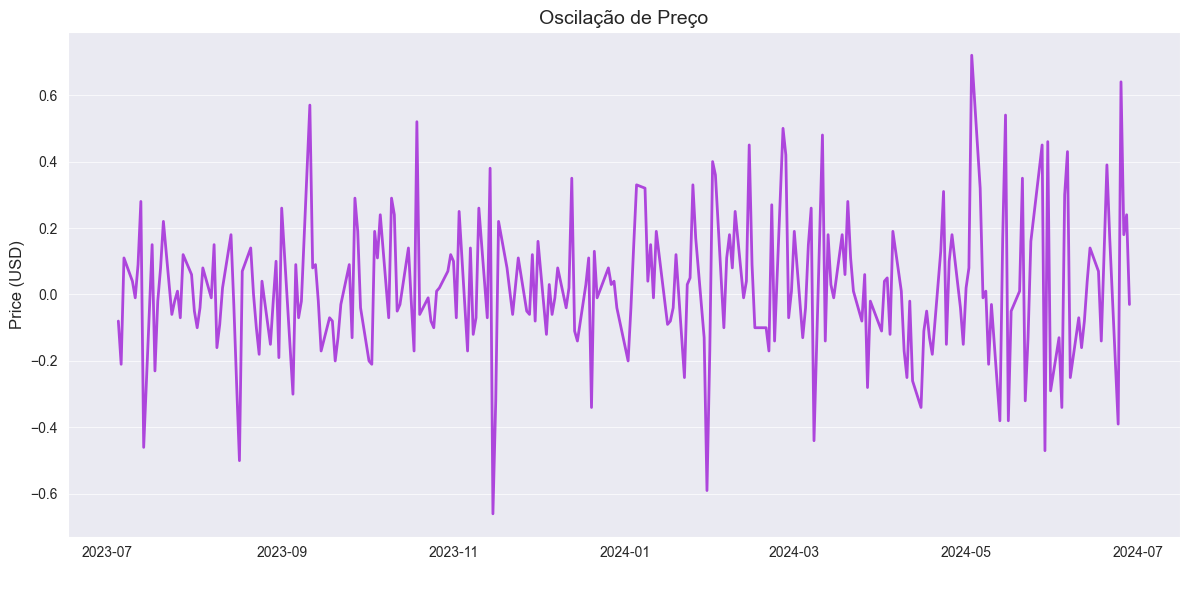

In [78]:
nu_data['Oscilation'] = nu_data['Close'] - nu_data['Close'].shift(1)

plt.figure(figsize=(12, 6))
plt.plot(nu_data['Oscilation'], linewidth=2, color=palette['purple'], alpha=0.7)
plt.title('Oscilação de Preço', fontsize=fontsize['figure_title'])
plt.xlabel(' ')
plt.ylabel('Price (USD)', fontsize=fontsize['figure_label'])
plt.grid(axis='y', alpha=0.7)

plt.tight_layout()

plt.savefig('../reports/figures/oscilation-price.png', bbox_inches='tight', dpi=300)

plt.show()

## **Decomposição de uma Serie Temporal**

Decompor uma série temporal consiste em separar a série em vários componentes distintos que, juntos, explicam a variação dos dados ao longo do tempo. Esse método é utilizado para entender melhor a estrutura da série temporal e identificar padrões subjacentes. A decomposição divide a séroe em três componentes principais:

**Têndencia:** 

revela a direção dos dados ao longo do tempo podendo ser ascendente descendente ou estável.
  
**Sazonalidade:** 

revela padrões repetitivos e previsíveis que ocorrem em intervalos regulares, muitas vezes causados por fatores sazonais como ciclos econômicos, clima, entre outros.

**Ruído:** 

revela a parte dos dados que não pode ser explicada pela tendência ou sazonalidade, composta por variações aleatórias e imprevisíveis que não seguem um padrão específico.

In [79]:
# definindo frequência de dias úteis
nu_data.asfreq('B')

# definindo decomposição por periodo bimestral
decomposition_bimonthly = seasonal_decompose(nu_data['Close'], period=42)

trend = decomposition_bimonthly.trend
seasonal = decomposition_bimonthly.seasonal
residual = decomposition_bimonthly.resid

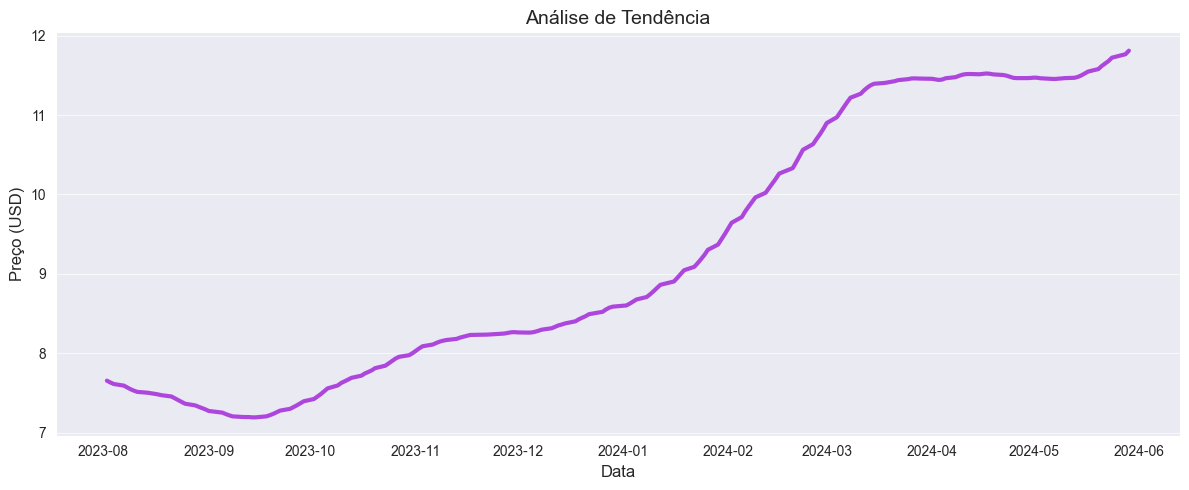

In [80]:
plt.figure(figsize=(12, 5))

plt.title('Análise de Tendência', fontsize=fontsize['figure_title'])
plt.plot(trend, color=palette['purple'], linewidth=3, alpha=0.7)
plt.xlabel('Data', fontsize=fontsize['figure_label'])
plt.ylabel('Preço (USD)', fontsize=fontsize['figure_label'])
plt.grid(axis='y', alpha=0.7)

plt.tight_layout()

plt.show()

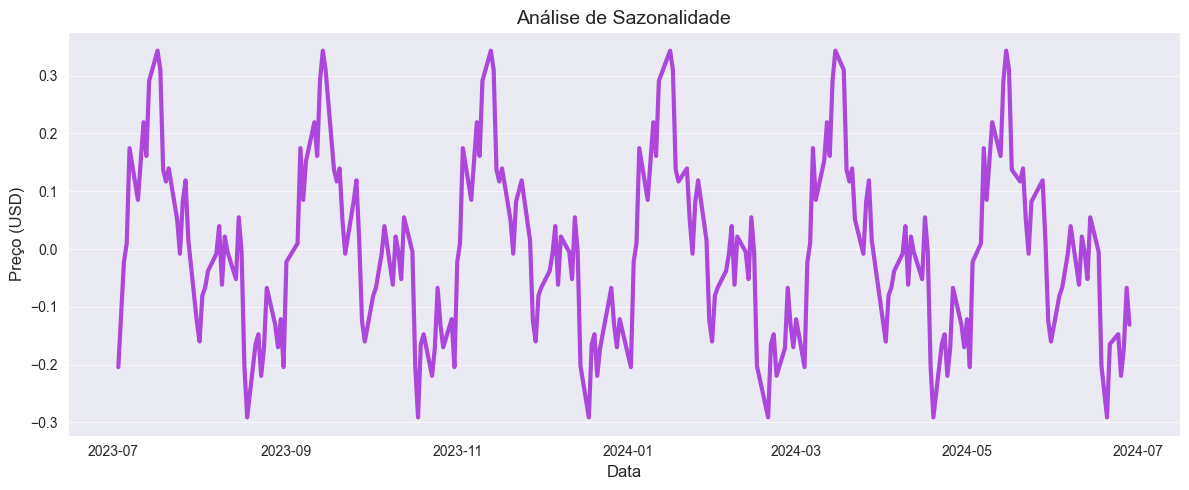

In [81]:
plt.figure(figsize=(12, 5))

plt.title('Análise de Sazonalidade', fontsize=fontsize['figure_title'])
plt.plot(seasonal, color=palette['purple'], linewidth=3, alpha=0.7)
plt.xlabel('Data', fontsize=fontsize['figure_label'])
plt.ylabel('Preço (USD)', fontsize=fontsize['figure_label'])
plt.grid(axis='y', alpha=0.7)

plt.tight_layout()

plt.show()

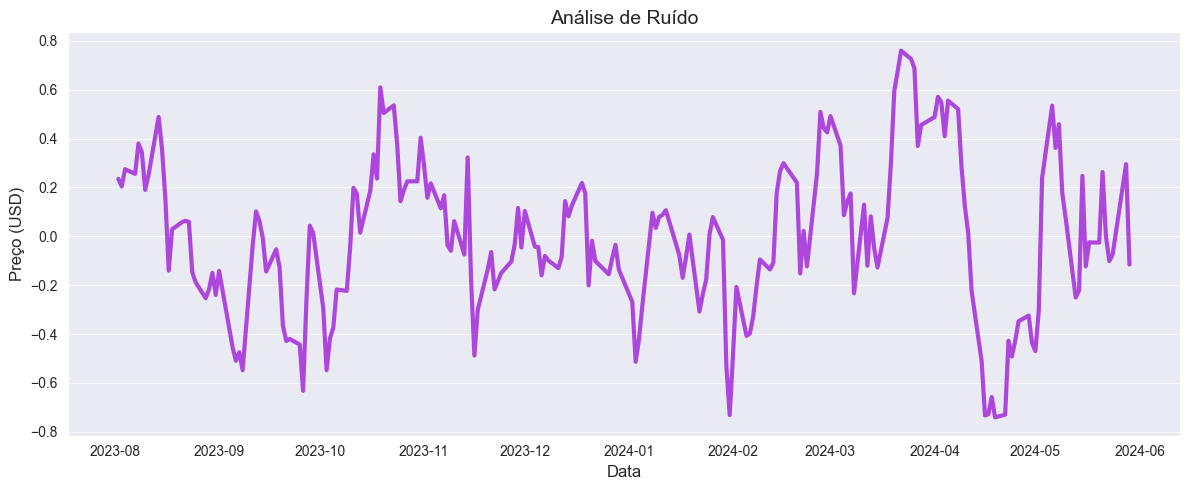

In [82]:
plt.figure(figsize=(12, 5))

plt.title('Análise de Ruído', fontsize=fontsize['figure_title'])
plt.plot(residual, color=palette['purple'], linewidth=3, alpha=0.7)
plt.xlabel('Data', fontsize=fontsize['figure_label'])
plt.ylabel('Preço (USD)', fontsize=fontsize['figure_label'])
plt.grid(axis='y', alpha=0.7)

plt.tight_layout()

plt.show()

In [83]:
nu_data.to_csv('../data/processed/nu_stock_data_with_metrics.csv', index=False)

## **Relatório**

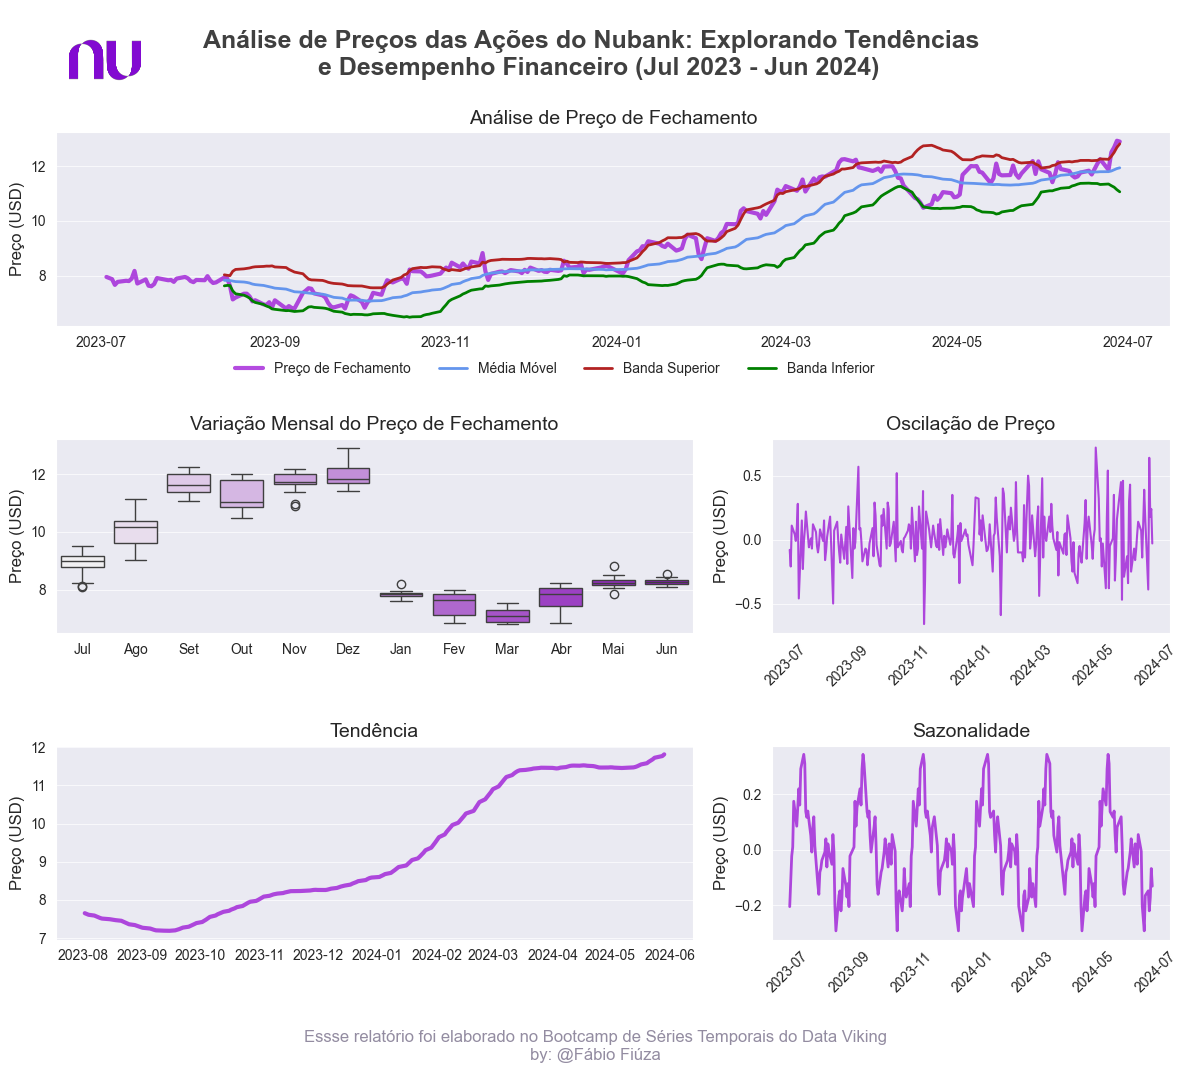

In [86]:
logo_path = '../images/nubank-logo.png'  
logo = mpimg.imread(logo_path)

grid = (3, 5)
axis = [None for _ in range(6)]

report = plt.figure(figsize=(12, 10))

# Cabeçalho
plt.suptitle(
    t='Análise de Preços das Ações do Nubank: Explorando Tendências \n e Desempenho Financeiro (Jul 2023 - Jun 2024)',
    fontsize=fontsize['header'],
    color=palette['gray'],
    fontweight=600,
    y=1
)

ax_logo = report.add_axes(
    [0.05, 0.92, 0.1, 0.1],
    anchor='NW',
    zorder=-1
)

ax_logo.imshow(logo)
ax_logo.axis('off')


# Grafico 1
axis[0] = plt.subplot2grid(
    shape=grid,
    loc=(0, 0),
    colspan=5
)

plt.title('Análise de Preço de Fechamento', fontsize=fontsize['figure_title'])
plt.plot(nu_data['Close'], color=palette['purple'], label='Preço de Fechamento', linewidth=3, alpha=0.7)
plt.plot(nu_data['SMA30'], color=palette['blue'], label='Média Móvel', linewidth=2)
plt.plot(nu_data['Upper_Band'], color=palette['red'], label='Banda Superior', linewidth=2)
plt.plot(nu_data['Lower_Band'], color=palette['green'], label='Banda Inferior', linewidth=2)
plt.legend(loc='upper left', bbox_to_anchor=(0.15, -0.12), ncol=4, facecolor='white', edgecolor='white')
plt.xlabel(' ')
plt.ylabel('Preço (USD)', fontsize=fontsize['figure_label'])
plt.grid(axis='y', alpha=0.7)

# Grafico 2

axis[1] = plt.subplot2grid(
    shape=grid,
    loc=(2, 0),
    colspan=3
)

plt.title('Tendência', fontsize=fontsize['figure_title'])
plt.plot(trend, color=palette['purple'], linewidth=3, alpha=0.7)
plt.xlabel(' ')
plt.ylabel('Preço (USD)', fontsize=fontsize['figure_label'])
plt.grid(axis='y', alpha=0.7)


# Grafico 3

axis[2] = plt.subplot2grid(
    shape=grid,
    loc=(1, 0),
    colspan=3
)

plt.title('Variação Mensal do Preço de Fechamento', fontsize=fontsize['figure_title'])

sns.boxplot(
    data=nu_data,
    x='Month',
    y='Close',
    palette=sns.light_palette(palette['purple'], n_colors=nu_data['Month'].nunique())
)

plt.xlabel(' ')
plt.ylabel('Preço (USD)', fontsize=fontsize['figure_label'])
plt.xticks(ticks=np.arange(len(meses)), labels=meses, ha='center', fontsize=fontsize['figure_ticks'])
plt.grid(axis='y', alpha=0.7)


# Grafico 4
axis[3] = plt.subplot2grid(
    shape=grid, 
    loc=(1, 3),
    colspan=2
)

plt.plot(
    nu_data['Oscilation'],
    label='Oscilação',
    color=palette['purple'],
    linewidth=1.5,
    alpha=0.7
)

plt.title('Oscilação de Preço', fontsize=fontsize['figure_title'])
plt.xlabel(' ')
plt.ylabel('Preço (USD)', fontsize=fontsize['figure_label'])
plt.xticks(fontsize=fontsize['figure_ticks'], rotation=45)
plt.yticks(fontsize=fontsize['figure_ticks'])
plt.grid(axis='y', alpha=0.7)

axis[4] = plt.subplot2grid(
    shape=grid,
    loc=(2, 3),
    colspan=2
)

plt.title('Sazonalidade', fontsize=fontsize['figure_title'])
plt.plot(seasonal, color=palette['purple'], linewidth=2, alpha=0.7)
plt.xlabel(' ')
plt.ylabel('Preço (USD)', fontsize=fontsize['figure_label'])
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.7)

# Rodapé
footer = '''
Essse relatório foi elaborado no Bootcamp de Séries Temporais do Data Viking
by: @Fábio Fiúza
'''

report.text(
    x=0.5,
    y=-0.05,
    s=footer,
    ha='center',
    va='bottom',
    size=fontsize['footer'],
    color=palette['light_gray']
)

plt.tight_layout()

plt.savefig('../reports/figures/nu-stock-analysis.png', bbox_inches='tight', dpi=300)

plt.show()